In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

#Número Top de Gens. En aquest cas vull els TOP5000
n=5000

#Fitxer que contè en CV els gens més epxressats de manera ordenada decreixent.
teixits = pd.read_csv('D:/TFM/ANALISI_MODELS/Datasets/all_gensCV_noversio_ZA.csv',sep =",")

In [2]:
#data = teixits.iloc[:, 1:4]
data=teixits

In [3]:
if (n==0 or n>(len(teixits.columns)-3)):
    n=len(teixits.columns)-3
    
data = teixits.iloc[:, 2:n+3]

In [4]:
data

,SMTSD,ENSG00000160882,ENSG00000259384,ENSG00000172023,ENSG00000280800,ENSG00000172179,ENSG00000210117,ENSG00000169248,ENSG00000159723,ENSG00000210154,...,ENSG00000102977,ENSG00000198185,ENSG00000108389,ENSG00000269343,ENSG00000276593,ENSG00000071243,ENSG00000141232,ENSG00000260911,ENSG00000062370,ENSG00000261604
0,Brain - Cortex,0.35630,0.0000,0.00000,0.00000,0.00000,0.4912,0.03501,0.30600,6.876,...,32.55,8.616,30.31,1.2620,2.611,4.564,29.94,14.880,3.819,4.152
1,Brain - Cerebellum,0.43660,0.2089,0.73670,0.05680,0.00000,0.7710,0.21980,0.48040,3.084,...,88.98,18.060,64.75,4.2640,1.907,11.820,43.58,9.342,8.706,3.156
2,Brain - Cortex,0.18460,4.2000,1.93800,0.00000,8.21200,6.0850,0.68150,0.11610,16.520,...,29.19,4.490,17.90,0.7351,2.364,3.400,28.50,3.686,2.780,1.779
3,Brain - Cerebellum,0.09784,15.7600,0.12580,0.05819,9.01800,7.1090,0.45040,0.28120,12.640,...,73.49,10.210,47.41,2.9420,8.106,9.901,43.52,11.600,8.054,2.246
4,Brain - Cortex,0.01387,6.9020,0.06242,0.02888,11.84000,1.9600,0.11180,0.34890,5.095,...,40.11,4.399,22.72,1.0070,1.308,3.616,45.48,1.603,2.729,4.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,Brain - Cortex,0.34510,0.0000,1.62900,0.00000,0.00000,3.3300,28.63000,0.50800,4.757,...,33.14,4.542,22.17,0.6266,2.411,3.153,30.05,2.665,2.749,5.950
2637,Brain - Cerebellum,0.39970,0.7800,1.74600,0.14680,0.00000,7.9730,0.00000,0.65050,7.973,...,77.61,18.050,62.37,3.1120,5.504,11.280,38.50,8.754,7.960,4.180
2638,Brain - Cortex,0.22160,8.2930,1.51900,0.00000,11.39000,2.9820,0.08501,0.58380,9.541,...,32.60,7.573,20.95,1.4260,2.064,5.220,168.20,2.438,2.571,1.808
2639,Brain - Cerebellum,0.00000,1.8660,0.00000,0.58550,0.55470,2.3840,0.00000,0.42440,9.537,...,40.44,4.125,54.04,2.0290,8.352,8.950,39.62,9.148,16.980,1.687


In [5]:
#Creació conjunt train i test

x,y=data.iloc[:, 1:n+1],data.iloc[:, 0]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

x_train = np.log2(x_train+1)
x_test = np.log2(x_test+1)

In [6]:
#Definim PCA

pca = PCA()

z= pca.fit_transform(x_train)

x_train_pca = z
x_test_pca  = pca.transform(x_test)

136 components expliquen un 95% de la variança. De 5000 dimensions a 136


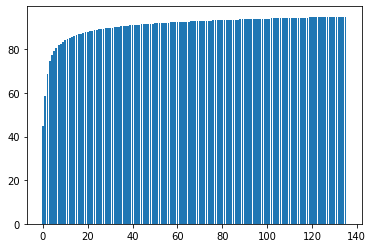

In [7]:
total = sum(pca.explained_variance_)

k = 0
current_variance = 0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " components expliquen un 95% de la variança. De ",n," dimensions a ", k, sep='')

pca = PCA(n_components=k)

x_train.pca = pca.fit(x_train)
x_train_pca = pca.transform(x_train)

x_test_pca = pca.transform(x_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [8]:
#Dinàmicament agafo el numero de Dimensions de PCA: k

principalDf = pd.DataFrame(data = x_train_pca[:,0:k])
             #, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,-22.562488,-7.673235,-8.277509,-10.633896,-7.370867,0.040713,13.422679,-1.087652,11.606942,-6.012188,...,-0.377673,-0.867024,0.191858,2.466027,1.057977,0.062915,-0.297578,0.618358,-0.662650,-1.519674
1,117.854634,16.541329,-13.167164,4.363768,-0.205304,-1.108700,1.525894,-2.601486,-0.669972,0.063996,...,0.372128,1.525595,0.288855,-0.990700,0.352449,0.785853,-0.650310,-0.164779,0.793211,0.414734
2,-47.203732,20.069492,-10.776511,-14.569679,24.049582,20.254822,-11.300175,18.134232,-5.476209,4.566375,...,-0.121049,0.049046,0.280791,0.865448,0.981369,0.676672,2.690770,-0.349978,-1.093969,-1.018442
3,-68.904292,35.732770,-48.564388,-4.698859,-8.504143,-8.794630,0.692704,-1.195305,-4.548584,-1.150805,...,0.867500,-0.409605,0.112243,0.698862,-1.589322,0.069973,0.846017,0.603692,-1.411279,-0.044146
4,-36.261473,1.575398,-29.411998,-13.316823,-6.781081,5.580774,3.932115,-5.744176,-2.379450,-8.891834,...,1.492097,0.837493,1.359405,0.769798,2.008149,-0.239864,-0.094447,0.526404,0.398258,0.221361


In [9]:
x_train_pca[:,0:11].shape

(2112, 11)

In [10]:
principalDf.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

finalDF = pd.concat([principalDf, y_train], axis=1)

finalDF.head(5)

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,SMTSD
0,-22.562488,-7.673235,-8.277509,-10.633896,-7.370867,0.040713,13.422679,-1.087652,11.606942,-6.012188,...,-0.867024,0.191858,2.466027,1.057977,0.062915,-0.297578,0.618358,-0.662650,-1.519674,Brain - Hippocampus
1,117.854634,16.541329,-13.167164,4.363768,-0.205304,-1.108700,1.525894,-2.601486,-0.669972,0.063996,...,1.525595,0.288855,-0.990700,0.352449,0.785853,-0.650310,-0.164779,0.793211,0.414734,Brain - Cerebellum
2,-47.203732,20.069492,-10.776511,-14.569679,24.049582,20.254822,-11.300175,18.134232,-5.476209,4.566375,...,0.049046,0.280791,0.865448,0.981369,0.676672,2.690770,-0.349978,-1.093969,-1.018442,Brain - Frontal Cortex (BA9)
3,-68.904292,35.732770,-48.564388,-4.698859,-8.504143,-8.794630,0.692704,-1.195305,-4.548584,-1.150805,...,-0.409605,0.112243,0.698862,-1.589322,0.069973,0.846017,0.603692,-1.411279,-0.044146,Brain - Nucleus accumbens (basal ganglia)
4,-36.261473,1.575398,-29.411998,-13.316823,-6.781081,5.580774,3.932115,-5.744176,-2.379450,-8.891834,...,0.837493,1.359405,0.769798,2.008149,-0.239864,-0.094447,0.526404,0.398258,0.221361,Brain - Frontal Cortex (BA9)


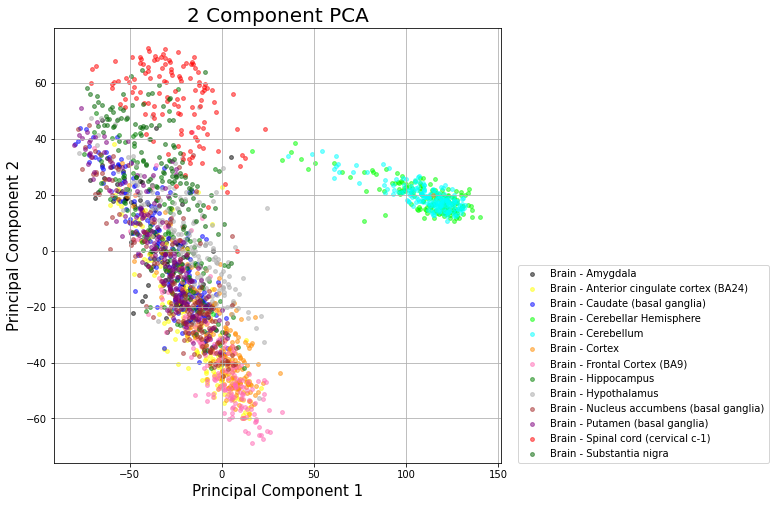

In [11]:
#Visualitzo la projecció 2D

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 1]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

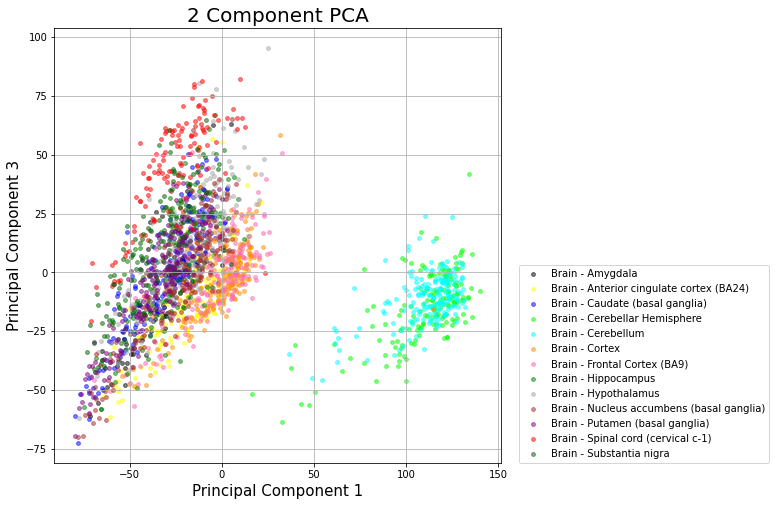

In [12]:

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 2]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

<b>tSNE Perplexity 30</b>

In [13]:
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1, random_state=1234)

points = tsne.fit_transform(x_train)

tsne_df = pd.DataFrame({'X':points[:,0],
                        'Y':points[:,1],
                        'Tipus Teixit':y_train})
tsne_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2112 samples in 0.010s...
[t-SNE] Computed neighbors for 2112 samples in 0.177s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2112
[t-SNE] Computed conditional probabilities for sample 2000 / 2112
[t-SNE] Computed conditional probabilities for sample 2112 / 2112
[t-SNE] Mean sigma: 13.754194
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.305405
[t-SNE] KL divergence after 1000 iterations: 1.025773


,X,Y,Tipus Teixit
0,11.837938,-23.388462,Brain - Hippocampus
1,-51.709583,17.250237,Brain - Cerebellum
2,12.713670,-7.088841,Brain - Frontal Cortex (BA9)
3,5.616210,5.062831,Brain - Nucleus accumbens (basal ganglia)
4,-4.438651,-11.054876,Brain - Frontal Cortex (BA9)


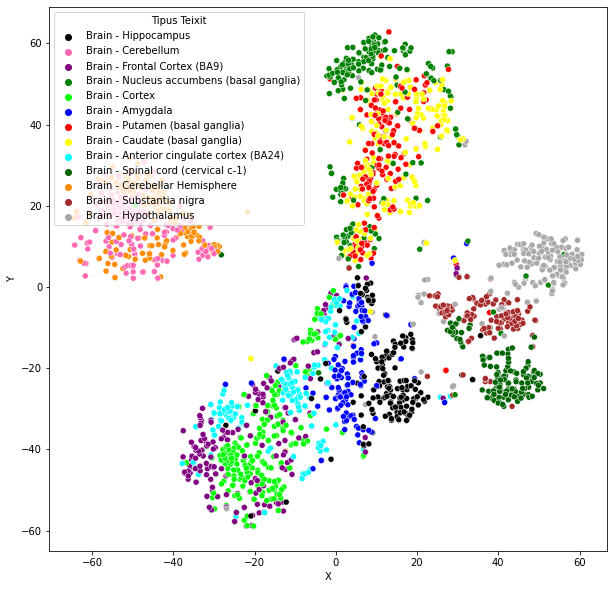

In [14]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x="X", y="Y",
              hue="Tipus Teixit",
              palette=["black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"],
              #legend='full',              
              data=tsne_df);

<b>Realització de Models</b>

<b>Model Classificador kNN</b>

In [15]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={"n_neighbors":range(5,25), "weights": ["uniform","distance"]}


# Validació creuada
# ==============================================================================
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()


grid = GridSearchCV(model , param_grid = param_grid,
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,                           
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(kNN) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model2 = grid.best_estimator_

r_model2 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions2 = model2.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy2 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions2,
            normalize = True
           )
print("")
print(f"(kNN) El accuracy de test és: {100*accuracy2}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions2,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 40 candidates, totalling 400 fits
37 # Prec. mitjana:  80.73146740588393  desv.:  1.8808660735132259  paràmetres:  {'n_neighbors': 5, 'weights': 'uniform'}
40 # Prec. mitjana:  80.54144683895197  desv.:  1.7451153098102203  paràmetres:  {'n_neighbors': 5, 'weights': 'distance'}
39 # Prec. mitjana:  80.63645712241797  desv.:  1.6622842762865198  paràmetres:  {'n_neighbors': 6, 'weights': 'uniform'}
38 # Prec. mitjana:  80.73124385227578  desv.:  2.212872251713589  paràmetres:  {'n_neighbors': 6, 'weights': 'distance'}
25 # Prec. mitjana:  81.67754627559688  desv.:  1.9273331759238101  paràmetres:  {'n_neighbors': 7, 'weights': 'uniform'}
11 # Prec. mitjana:  81.91496020745774  desv.:  2.231498813536133  paràmetres:  {'n_neighbors': 7, 'weights': 'distance'}
36 # Prec. mitjana:  80.82535992130913  desv.:  1.7065774962416642  paràmetres:  {'n_neighbors': 8, 'weights': 'uniform'}
27 # Prec. mitjana:  81.63060001788429  desv.:  1.989296527198006  paràmetres:  {'

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,30,0,0,0,0,0,0,1,1,0,2,0,0
Brain - Anterior cingulate cortex (BA24),0,22,0,0,0,1,5,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,40,0,0,0,1,0,0,3,8,0,0
Brain - Cerebellar Hemisphere,0,0,0,47,4,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,2,53,0,0,0,0,0,0,0,0
Brain - Cortex,0,0,0,0,0,42,0,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),3,0,0,0,0,6,24,0,0,0,0,0,0
Brain - Hippocampus,4,1,0,0,0,0,2,31,0,0,0,2,1
Brain - Hypothalamus,0,0,0,1,0,0,0,1,33,1,0,0,3


<b>SVM</b>

In [16]:
#Emprant Reducció PCA
#============================
# Grid d'hiperparàmetres
# ==============================================================================
param_grid = {"C": (0.01, 0.1, 1, 10, 100, 150, 200, 250 , 300, 1000), "gamma": (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.005, 0.1,0.5, 1, 10)}

# Validació creuada
# ==============================================================================
from sklearn import svm

model = svm.SVC()
grid = GridSearchCV(model, param_grid = param_grid,                           
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)

    
# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(SVM) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model3 = grid.best_estimator_

r_model3 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions3 = model3.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy3 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions3,
            normalize = True
           )
print("")
print(f"(SVM) El accuracy de test és: {100*accuracy3}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions3,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
52 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-06}
52 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-05}
44 # Prec. mitjana:  19.744254672270408  desv.:  0.6686704794789121  paràmetres:  {'C': 0.01, 'gamma': 0.0001}
52 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.001}
52 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.01}
52 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.005}
52 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.1}
52 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.5}
52 # Prec. mitjana:  10.038004113386389  desv.:  0.1

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,34,0,0,0,0,0,0,0,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),0,26,0,0,0,0,2,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,1,48,0,0,0,0,0,0,1,2,0,0
Brain - Cerebellar Hemisphere,0,0,0,51,0,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,0,55,0,0,0,0,0,0,0,0
Brain - Cortex,0,0,0,0,0,42,0,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,0,0,0,0,0,33,0,0,0,0,0,0
Brain - Hippocampus,0,4,0,0,0,0,1,36,0,0,0,0,0
Brain - Hypothalamus,0,0,0,1,0,0,0,0,36,1,0,0,1


<b>Arbres de decisió</b>

In [17]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'min_samples_split' :(2, 10, 20, 50 ,75,100,500,1000),'max_depth':(4,5,6,7,8,9,10,20,50,100,200,300,400,450,460,470,500,550,600,650,700,1000)}

# Validació creuada
# ==============================================================================
import sklearn.tree

model=sklearn.tree.DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Arbre de Decissió) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model4 = grid.best_estimator_

r_model4 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions4 = model4.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy4 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions4,
            normalize = True
           )
print("")
print(f"(Arbre de Decissió) El accuracy de test és: {100*accuracy4}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions4,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 176 candidates, totalling 1760 fits
127 # Prec. mitjana:  55.210363945274075  desv.:  3.4171062331741933  paràmetres:  {'max_depth': 4, 'min_samples_split': 2}
127 # Prec. mitjana:  55.210363945274075  desv.:  3.3102648045476344  paràmetres:  {'max_depth': 4, 'min_samples_split': 10}
127 # Prec. mitjana:  55.210363945274075  desv.:  3.3102648045476344  paràmetres:  {'max_depth': 4, 'min_samples_split': 20}
130 # Prec. mitjana:  55.163641241169636  desv.:  3.5177652771098655  paràmetres:  {'max_depth': 4, 'min_samples_split': 50}
130 # Prec. mitjana:  55.163641241169636  desv.:  3.5177652771098655  paràmetres:  {'max_depth': 4, 'min_samples_split': 75}
130 # Prec. mitjana:  55.163641241169636  desv.:  3.5177652771098655  paràmetres:  {'max_depth': 4, 'min_samples_split': 100}
154 # Prec. mitjana:  36.83738710542788  desv.:  0.8237472399856128  paràmetres:  {'max_depth': 4, 'min_samples_split': 500}
155 # Prec. mitjana:  31.44013234373603  desv.:  1.104045607

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,24,1,0,0,0,2,1,1,0,0,0,0,5
Brain - Anterior cingulate cortex (BA24),0,24,0,0,0,0,4,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,1,42,0,0,0,0,0,0,4,5,0,0
Brain - Cerebellar Hemisphere,0,0,0,39,10,0,0,0,1,0,0,0,1
Brain - Cerebellum,0,0,0,4,51,0,0,0,0,0,0,0,0
Brain - Cortex,0,1,0,0,1,29,8,1,1,0,0,1,0
Brain - Frontal Cortex (BA9),0,2,0,0,0,5,23,0,0,0,0,2,1
Brain - Hippocampus,0,5,0,0,0,0,2,23,5,0,0,3,3
Brain - Hypothalamus,0,1,0,0,0,0,2,0,31,2,0,1,2


<b>Random Forest</b>

In [18]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'n_estimators' :(10, 50 ,100 ,200, 250, 400),'max_depth':(6,7,8,9,10,11,12,15,20,25,30)}

# Validació creuada
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Random Forest) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model5 = grid.best_estimator_

r_model5 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions5 = model5.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy5 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions5,
            normalize = True
           )
print("")
print(f"(Random Forest) El accuracy de test és: {100*accuracy5}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions5,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 66 candidates, totalling 660 fits
66 # Prec. mitjana:  76.22999195207011  desv.:  2.8968132786772345  paràmetres:  {'max_depth': 6, 'n_estimators': 10}
54 # Prec. mitjana:  85.84547974604311  desv.:  2.0479607312987924  paràmetres:  {'max_depth': 6, 'n_estimators': 50}
52 # Prec. mitjana:  87.16958776714655  desv.:  1.0338971549643325  paràmetres:  {'max_depth': 6, 'n_estimators': 100}
42 # Prec. mitjana:  88.2106769203255  desv.:  1.0630190096885892  paràmetres:  {'max_depth': 6, 'n_estimators': 200}
44 # Prec. mitjana:  87.92810515961727  desv.:  1.5423578923956305  paràmetres:  {'max_depth': 6, 'n_estimators': 250}
40 # Prec. mitjana:  88.40136814808191  desv.:  1.6141375684234567  paràmetres:  {'max_depth': 6, 'n_estimators': 400}
65 # Prec. mitjana:  77.51207189484039  desv.:  2.4922808709640867  paràmetres:  {'max_depth': 7, 'n_estimators': 10}
55 # Prec. mitjana:  85.56067244925333  desv.:  1.7953055666169595  paràmetres:  {'max_depth': 7, 'n_estimat

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,31,2,0,0,0,0,0,0,0,0,0,0,1
Brain - Anterior cingulate cortex (BA24),0,25,0,0,0,0,3,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,46,0,0,0,1,0,0,1,4,0,0
Brain - Cerebellar Hemisphere,0,0,0,47,4,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,2,53,0,0,0,0,0,0,0,0
Brain - Cortex,0,0,0,0,0,42,0,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,1,0,0,0,3,27,0,2,0,0,0,0
Brain - Hippocampus,1,1,0,0,0,0,2,35,2,0,0,0,0
Brain - Hypothalamus,0,0,0,1,0,0,0,1,35,1,0,0,1


In [19]:
print("##################################################")
print(f"Model kNN Accuracy: {100*r_model2:.2f}%")
print(f"Model kNN, Accuracy de test és: {100*accuracy2:.2f}%")
print("##################################################")
print(f"Model Svm Accuracy: {100*r_model3:.2f}%")
print(f"Model Svm, Accuracy de test és: {100*accuracy3:.2f}%")
print("##################################################")
print(f"Model Arbre de Decisió: {100*r_model4:.2f}%")
print(f"Model Arbre de Decisió, Accuracy de test és: {100*accuracy4:.2f}%")
print("##################################################")
print(f"Model Random Forest: {100*r_model5:.2f}%")
print(f"Model Random Forest, Accuracy de test és: {100*accuracy5:.2f}%")


##################################################
Model kNN Accuracy: 82.44%
Model kNN, Accuracy de test és: 86.01%
##################################################
Model Svm Accuracy: 94.37%
Model Svm, Accuracy de test és: 96.22%
##################################################
Model Arbre de Decisió: 73.91%
Model Arbre de Decisió, Accuracy de test és: 76.56%
##################################################
Model Random Forest: 90.53%
Model Random Forest, Accuracy de test és: 91.68%
